In [1]:
import pandas as pd
import numpy as np
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt
import time

In [2]:
df = pd.read_csv('full_df.csv')

In [3]:
df

,Date,Close,Open,High,Low,Vol,Change %,average_clustering,density,number_of_edges,number_of_nodes,degree_assortativity_coefficient
0,7-Nov-10,0.3,0.4,0.5,0.1,341460.0,-0.29,0.007455,0.000029,83901,53777,-0.034259
1,14-Nov-10,0.3,0.3,0.3,0.2,146410.0,0.00,0.005057,0.000031,81415,50991,-0.014705
2,21-Nov-10,0.3,0.3,0.3,0.3,73380.0,0.00,0.004321,0.000031,76046,49316,0.014105
3,28-Nov-10,0.2,0.3,0.3,0.2,136930.0,-0.28,0.006888,0.000028,90315,56969,-0.054024
4,5-Dec-10,0.2,0.2,0.2,0.2,66890.0,0.00,0.006479,0.000027,90881,57686,-0.028229
...,...,...,...,...,...,...,...,...,...,...,...,...
107,25-Nov-12,12.6,12.4,12.7,11.9,189370.0,0.01,0.007650,0.000003,1209759,676350,-0.031663
108,2-Dec-12,13.4,12.6,13.7,12.4,226350.0,0.07,0.008245,0.000003,1051403,583087,-0.024736
109,9-Dec-12,13.5,13.4,13.9,13.0,228090.0,0.01,0.008665,0.000004,877302,486018,-0.028629
110,16-Dec-12,13.4,13.5,13.7,12.8,241510.0,-0.01,0.009038,0.000004,932686,508916,-0.029427


In [4]:
dates = df["Date"]
df.drop("Date",axis= 1, inplace = True)

In [5]:
Y = df["Close"]
X = df.drop(["Close"],axis=1)

In [6]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [8]:
trainX = np.array(X_train)
testX = np.array(X_test)

In [9]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [10]:
look_back = 10

In [11]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, y_train, epochs=85, batch_size=1, verbose=2)

Epoch 1/85
75/75 - 0s - loss: 64.2855
Epoch 2/85
75/75 - 0s - loss: 60.3665
Epoch 3/85
75/75 - 0s - loss: 55.5781
Epoch 4/85
75/75 - 0s - loss: 50.5877
Epoch 5/85
75/75 - 0s - loss: 46.0530
Epoch 6/85
75/75 - 0s - loss: 42.1642
Epoch 7/85
75/75 - 0s - loss: 38.8884
Epoch 8/85
75/75 - 0s - loss: 36.1832
Epoch 9/85
75/75 - 0s - loss: 33.8466
Epoch 10/85
75/75 - 0s - loss: 31.8443
Epoch 11/85
75/75 - 0s - loss: 30.0981
Epoch 12/85
75/75 - 0s - loss: 28.5531
Epoch 13/85
75/75 - 0s - loss: 27.1595
Epoch 14/85
75/75 - 0s - loss: 25.8591
Epoch 15/85
75/75 - 0s - loss: 24.6802
Epoch 16/85
75/75 - 0s - loss: 23.5635
Epoch 17/85
75/75 - 0s - loss: 22.5210
Epoch 18/85
75/75 - 0s - loss: 21.5556
Epoch 19/85
75/75 - 0s - loss: 20.6081
Epoch 20/85
75/75 - 0s - loss: 19.7513
Epoch 21/85
75/75 - 0s - loss: 18.9520
Epoch 22/85
75/75 - 0s - loss: 18.2228
Epoch 23/85
75/75 - 0s - loss: 17.5421
Epoch 24/85
75/75 - 0s - loss: 16.9217
Epoch 25/85
75/75 - 0s - loss: 16.3660
Epoch 26/85
75/75 - 0s - loss: 15.

In [12]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train, trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test, testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
#calculate MAE
trainScore=mae(y_train, trainPredict[:,0])
print('Train Score: %.2f MAE' % (trainScore))
testScore=mae(y_test, testPredict[:,0])
print('Test Score: %.2f MAE' % (testScore))
#calculate MAPE
trainScore=mape(y_train, trainPredict[:,0])
print('Train Score: %.2f MAPE' % (trainScore))
testScore=mape(y_test, testPredict[:,0])
print('Test Score: %.2f MAPE' % (testScore))

Train Score: 1.51 RMSE
Test Score: 1.40 RMSE
Train Score: 0.89 MAE
Test Score: 0.89 MAE
Train Score: 0.16 MAPE
Test Score: 0.25 MAPE


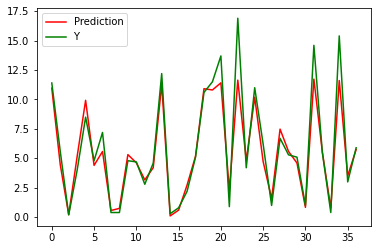

In [13]:
plt.plot(np.arange(37),testPredict, c="r",label="Prediction")
plt.plot(np.arange(37),y_test, c="g", label="Y")
plt.legend()
plt.show()

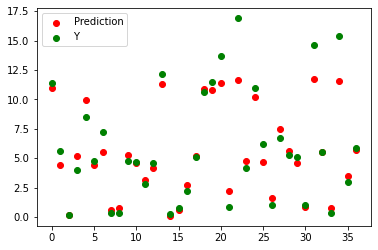

In [14]:
plt.scatter(np.arange(37),testPredict, c="r",label="Prediction")
plt.scatter(np.arange(37),y_test, c="g",label="Y")
plt.legend()
plt.show()

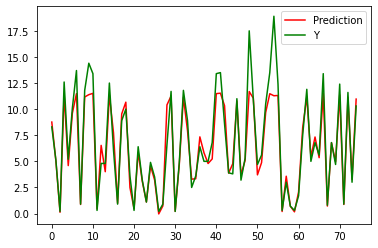

In [15]:
plt.plot(np.arange(trainPredict.shape[0]),trainPredict, c="r", label="Prediction")
plt.plot(np.arange(trainPredict.shape[0]),y_train, c="g", label="Y")
plt.legend()
plt.show()

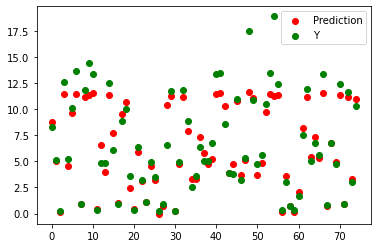

In [16]:
plt.scatter(np.arange(trainPredict.shape[0]),trainPredict, c="r", label="Prediction")
plt.scatter(np.arange(trainPredict.shape[0]),y_train, c="g", label="Y")
plt.legend()
plt.show()

In [17]:
df = pd.read_csv('price_informations.csv')[:112]

In [18]:
df

,Date,Close,Open,High,Low,Vol,Change %
0,7-Nov-10,0.3,0.4,0.5,0.1,341460.0,-0.29
1,14-Nov-10,0.3,0.3,0.3,0.2,146410.0,0.00
2,21-Nov-10,0.3,0.3,0.3,0.3,73380.0,0.00
3,28-Nov-10,0.2,0.3,0.3,0.2,136930.0,-0.28
4,5-Dec-10,0.2,0.2,0.2,0.2,66890.0,0.00
...,...,...,...,...,...,...,...
107,25-Nov-12,12.6,12.4,12.7,11.9,189370.0,0.01
108,2-Dec-12,13.4,12.6,13.7,12.4,226350.0,0.07
109,9-Dec-12,13.5,13.4,13.9,13.0,228090.0,0.01
110,16-Dec-12,13.4,13.5,13.7,12.8,241510.0,-0.01


In [19]:
dates = df["Date"]
df.drop("Date",axis= 1, inplace = True)
Y = df["Close"]
X = df.drop(["Close"],axis=1)
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
trainX = np.array(X_train)
testX = np.array(X_test)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
look_back = 5

model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, y_train, epochs=85, batch_size=1, verbose=2)

Epoch 1/85
75/75 - 0s - loss: 66.2290
Epoch 2/85
75/75 - 0s - loss: 63.7385
Epoch 3/85
75/75 - 0s - loss: 60.2819
Epoch 4/85
75/75 - 0s - loss: 55.9045
Epoch 5/85
75/75 - 0s - loss: 51.1695
Epoch 6/85
75/75 - 0s - loss: 46.6247
Epoch 7/85
75/75 - 0s - loss: 42.5077
Epoch 8/85
75/75 - 0s - loss: 38.9148
Epoch 9/85
75/75 - 0s - loss: 35.8348
Epoch 10/85
75/75 - 0s - loss: 33.1566
Epoch 11/85
75/75 - 0s - loss: 30.8664
Epoch 12/85
75/75 - 0s - loss: 28.9280
Epoch 13/85
75/75 - 0s - loss: 27.2313
Epoch 14/85
75/75 - 0s - loss: 25.7631
Epoch 15/85
75/75 - 0s - loss: 24.4840
Epoch 16/85
75/75 - 0s - loss: 23.3715
Epoch 17/85
75/75 - 0s - loss: 22.3702
Epoch 18/85
75/75 - 0s - loss: 21.4772
Epoch 19/85
75/75 - 0s - loss: 20.6619
Epoch 20/85
75/75 - 0s - loss: 19.9180
Epoch 21/85
75/75 - 0s - loss: 19.2234
Epoch 22/85
75/75 - 0s - loss: 18.5389
Epoch 23/85
75/75 - 0s - loss: 17.9014
Epoch 24/85
75/75 - 0s - loss: 17.2674
Epoch 25/85
75/75 - 0s - loss: 16.6508
Epoch 26/85
75/75 - 0s - loss: 16.

In [20]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train, trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test, testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
#calculate MAE
trainScore=mae(y_train, trainPredict[:,0])
print('Train Score: %.2f MAE' % (trainScore))
testScore=mae(y_test, testPredict[:,0])
print('Test Score: %.2f MAE' % (testScore))
#calculate MAPE
trainScore=mape(y_train, trainPredict[:,0])
print('Train Score: %.2f MAPE' % (trainScore))
testScore=mape(y_test, testPredict[:,0])
print('Test Score: %.2f MAPE' % (testScore))

Train Score: 1.48 RMSE
Test Score: 1.32 RMSE
Train Score: 0.83 MAE
Test Score: 0.86 MAE
Train Score: 0.15 MAPE
Test Score: 0.24 MAPE


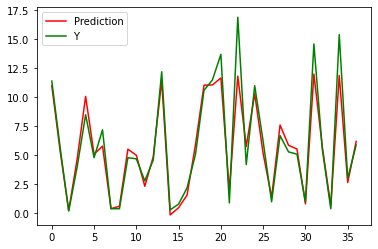

In [21]:
plt.plot(np.arange(testPredict.shape[0]),testPredict, c="r",label="Prediction")
plt.plot(np.arange(testPredict.shape[0]),y_test, c="g", label="Y")
plt.legend()
plt.show()

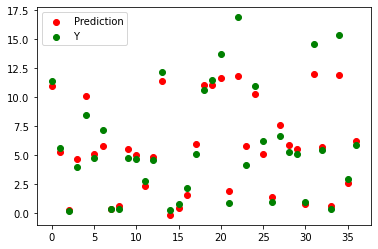

In [22]:
plt.scatter(np.arange(testPredict.shape[0]),testPredict, c="r",label="Prediction")
plt.scatter(np.arange(testPredict.shape[0]),y_test, c="g",label="Y")
plt.legend()
plt.show()

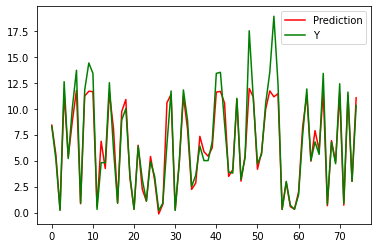

In [23]:
plt.plot(np.arange(trainPredict.shape[0]),trainPredict, c="r", label="Prediction")
plt.plot(np.arange(trainPredict.shape[0]),y_train, c="g", label="Y")
plt.legend()
plt.show()

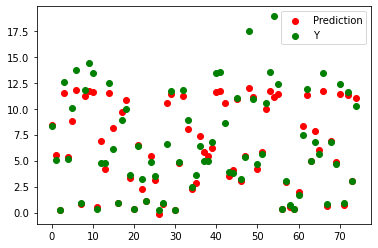

In [24]:
plt.scatter(np.arange(trainPredict.shape[0]),trainPredict, c="r", label="Prediction")
plt.scatter(np.arange(trainPredict.shape[0]),y_train, c="g", label="Y")
plt.legend()
plt.show()